The purpose of this notebook is to explore the data

# 1. Load and import

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
#Loading the data
DF_PATH = './../../Data/Dataframes/'

eulogies = pd.read_csv(DF_PATH + 'all_eul.csv')
sec = pd.read_csv(DF_PATH + 'sec_perp.csv')

In [31]:
eulogies.sort_values(by='Annee', inplace=True)

In [32]:
eulogies.reset_index(inplace=True)
eulogies.pop('index')

0       56
1       61
2       65
3       29
4        0
      ... 
333    333
334    334
335    335
336    336
337    337
Name: index, Length: 338, dtype: int64

In [33]:
sec.tail()

,Name,Début,Fin,Aux_Début,Aux_Fin,Duree
34,Gros,1991,2001,0.0,0.0,10.0
35,Le Douarin,2001,2006,0.0,0.0,5.0
36,Bach,2006,2015,0.0,0.0,9.0
37,Cossart,2016,2021,0.0,0.0,5.0
38,Fontenelle,1697,1740,0.0,0.0,43.0


# 2. Exploring the dataset

In [34]:
print("Number of eulogies : " + str(eulogies.shape[0]))

Number of eulogies : 338


## a. By year

In [35]:
print("First year of publication : " + str(int(min(eulogies.Annee))))
print("Last year of publication : " + str(int(max(eulogies.Annee))))

First year of publication : 1700
Last year of publication : 1943


In [36]:
eulogies['Annee'].value_counts()

1773.0    27
1782.0     8
1812.0     8
1783.0     6
1743.0     6
          ..
1702.0     1
1819.0     1
1818.0     1
1817.0     1
1943.0     1
Name: Annee, Length: 175, dtype: int64

In [37]:
print('The author the year with the most publications is : ' + 
      eulogies[eulogies['Annee']==1773].reset_index().loc[0, 'Auteur'])


The author the year with the most publications is : Condorcet


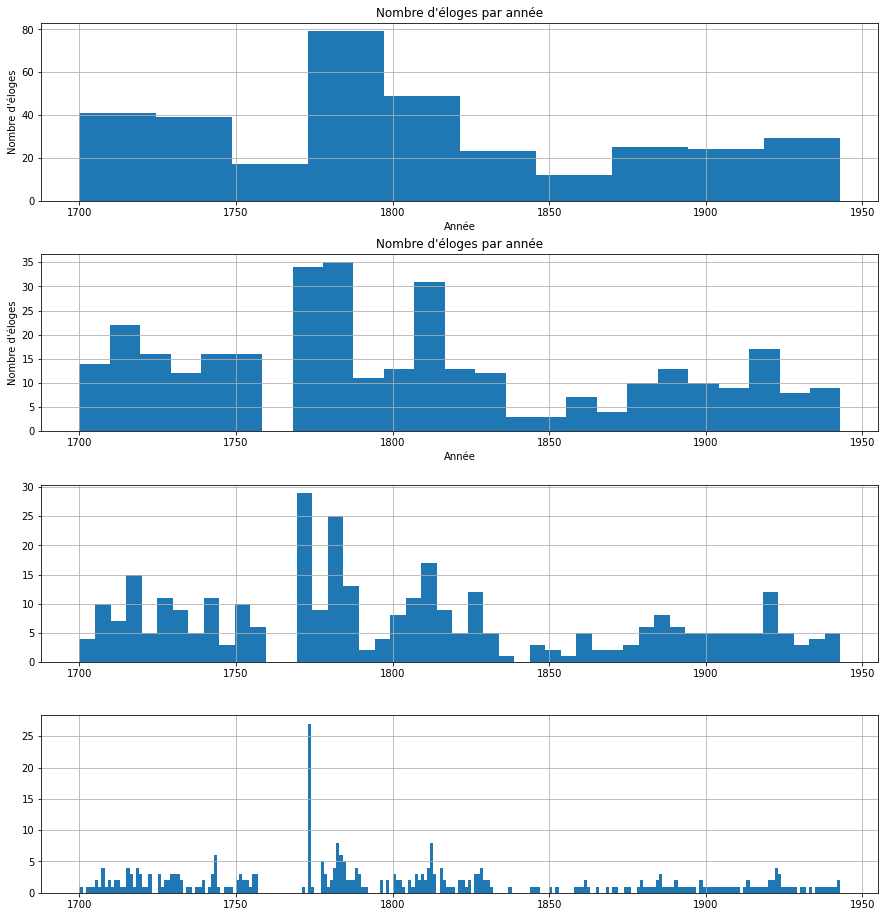

In [38]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize = (15,16))

nbins = int((max(eulogies.Annee)-min(eulogies.Annee))/10) + 1
nbins_5ann = int((max(eulogies.Annee)-min(eulogies.Annee))/5) + 1


nbins_ann = int((max(eulogies.Annee)-min(eulogies.Annee))) 
#df['Annee'].hist(bins = nbins)
eulogies['Annee'].hist(ax = axes[0])
eulogies['Annee'].hist(bins = nbins, ax = axes[1])
eulogies['Annee'].hist(bins = nbins_5ann, ax = axes[2])
eulogies['Annee'].hist(bins = nbins_ann, ax = axes[3])

for i in range(2):
    axes[i].set_title("Nombre d'éloges par année")
    axes[i].set_xlabel('Année')
    axes[i].set_ylabel("Nombre d'éloges")

plt.subplots_adjust(hspace = 0.3)

In [39]:
df_fouchy = eulogies[eulogies['Auteur']=='Fouchy']
df_fouchy
print('Première éloge de Fouchy :' + str(df_fouchy['Annee'].min()))
print('Dernière éloge de Fouchy :' + str(df_fouchy['Annee'].max()))

Première éloge de Fouchy :1744.0
Dernière éloge de Fouchy :1756.0


In [40]:
print('Première éloge :' + str(min(eulogies['Annee'])))
print('Dernière éloge :' + str(max(eulogies['Annee'])))

Première éloge :1700.0
Dernière éloge :1943.0


## b. By author

In [41]:
print("Number of different authors : " + str(eulogies['Auteur'].nunique()))

Number of different authors : 34


Text(0, 0.5, "Nombre d'éloges")

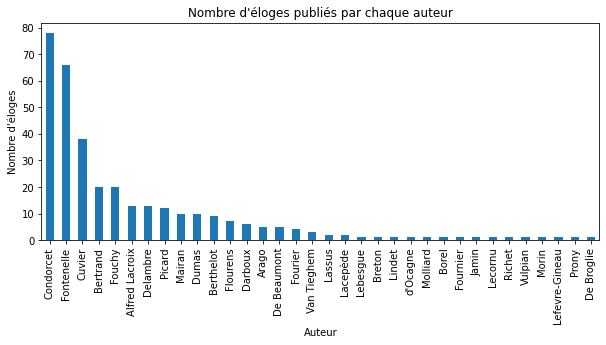

In [42]:
eulogies['Auteur'].value_counts().plot(kind = 'bar', figsize = (10, 4))
plt.title("Nombre d'éloges publiés par chaque auteur")
plt.xlabel('Auteur')
plt.ylabel("Nombre d'éloges")

In [43]:
print('Fontenelle was Secretary for ' + str(int(sec.loc[38, 'Duree'])) + ' years')
print('Condorcet was Secretary for ' + str(int(sec.loc[2, 'Duree'])) + ' years')
print('Cuvier was Secretary for ' + str(int(sec.loc[20, 'Duree'])) + ' years')
print('Fouchy was Secretary for ' + str(int(sec.loc[1, 'Duree'])) + ' years')


Fontenelle was Secretary for 43 years
Condorcet was Secretary for 17 years
Cuvier was Secretary for 31 years
Fouchy was Secretary for 33 years


In [44]:
sec = sec[sec['Début']<=1943]


Text(0, 0.5, "Nombre d'année")

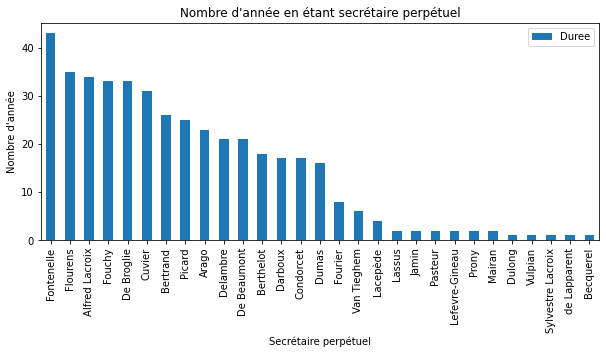

In [45]:
sec.sort_values(by='Duree', ascending = False, inplace = True)

sec.plot(x = 'Name', y = 'Duree', kind = 'bar', figsize = (10,4))
plt.title("Nombre d'année en étant secrétaire perpétuel")
plt.xlabel("Secrétaire perpétuel")
plt.ylabel("Nombre d'année")

In [46]:
#Checking if the author is a secretary

eulogies['Sec'] = eulogies['Auteur'].apply(lambda x : x in sec.Name.unique())

Looking for the eulogies that were not written by secretaries

In [47]:
eulogies[eulogies['Sec']==False]

,Savant,Auteur,Annee,Eloge,Sec
260,Piobert,Morin,1871.0,"\n\tMessieurs, \n\tC'est ordinairement aux Sec...",False
302,Lucas-Championnière,Richet,1913.0,\n Le grand-père de Lucas-Championnière fut un...,False
305,Maurice Levy,Lecornu,1915.0,"\n Je ne saurais, dans les circonstances actue...",False
311,Schloesing,Lindet,1920.0,\n La belle carrière scientifique de J.- J.-Th...,False
313,Guyou,Fournier,1921.0,"\n I. \t \n Emile Guyou est né, le 25 novembre...",False
314,Humbert,Borel,1922.0,\n I. \t \n Georges Humbert est né à Paris le ...,False
315,Carpentier,d'Ocagne,1922.0,"\n Il serait, sans doute, possible de caractér...",False
317,Carnot,Breton,1922.0,"\n Adolphe Carnot, dont le nom, la famille se ...",False
318,Bonnier,Molliard,1923.0,"\n Bonnier (Gaston- Eugène-Marie), né à Paris ...",False
320,Jordan,Lebesgue,1923.0,"\n La section de Géométrie vient, à deux repri...",False


- Molliard : https://fr.wikipedia.org/wiki/Marin_Molliard membre de l'Académie des Sciences, botaniste
- Morin : https://fr.wikipedia.org/wiki/Arthur_Morin membre de l'Académie des Sciences, physicien
- Lindet : https://www.yumpu.com/fr/document/view/17144116/leon-lindet-academie-des-sciences
- Fournier : https://fr.wikipedia.org/wiki/Joseph-Xavier_Fournier
- Borel :
- d'Ocagne :
- Breton :
- Lebesgue :
- Lecornu :
- Richet : 

In [48]:
df = eulogies[eulogies['Sec']]
df

,Savant,Auteur,Annee,Eloge,Sec
0,Daniel Tauvry,Fontenelle,1700.0,NaN,True
1,Adrien Tuillier,Fontenelle,1702.0,NaN,True
2,Vincenzio Viviani,Fontenelle,1703.0,NaN,True
3,Guillaume-François-Antoine de Sainte Mesme de ...,Fontenelle,1704.0,NaN,True
4,Guillaume Amontons,Fontenelle,1705.0,NaN,True
...,...,...,...,...,...
333,Onnes,Picard,1939.0,"Messieurs, \t\n Je me propose aujourd'hui de v...",True
334,Membres et correspondants de l'academie des s...,Alfred Lacroix,1940.0,"Messieurs, \t\n Cette année encore ma Notice h...",True
335,Hamy,Picard,1941.0,"\n Messieurs, \t\n Il est dans les traditions ...",True
336,Picard,De Broglie,1942.0,"\n Messieurs, \t\n Dans notre Compagnie, il es...",True


In [49]:
eul_sec = eulogies.merge(sec, how = 'left', left_on = 'Auteur', right_on = 'Name')
eul_sec.head()

,Savant,Auteur,Annee,Eloge,Sec,Name,Début,Fin,Aux_Début,Aux_Fin,Duree
0,Daniel Tauvry,Fontenelle,1700.0,NaN,True,Fontenelle,1697.0,1740.0,0.0,0.0,43.0
1,Adrien Tuillier,Fontenelle,1702.0,NaN,True,Fontenelle,1697.0,1740.0,0.0,0.0,43.0
2,Vincenzio Viviani,Fontenelle,1703.0,NaN,True,Fontenelle,1697.0,1740.0,0.0,0.0,43.0
3,Guillaume-François-Antoine de Sainte Mesme de ...,Fontenelle,1704.0,NaN,True,Fontenelle,1697.0,1740.0,0.0,0.0,43.0
4,Guillaume Amontons,Fontenelle,1705.0,NaN,True,Fontenelle,1697.0,1740.0,0.0,0.0,43.0


In [50]:
count = pd.DataFrame(eulogies.Auteur.value_counts()).reset_index()
count

,index,Auteur
0,Condorcet,78
1,Fontenelle,66
2,Cuvier,38
3,Bertrand,20
4,Fouchy,20
5,Alfred Lacroix,13
6,Delambre,13
7,Picard,12
8,Mairan,10
9,Dumas,10


In [51]:
sec = sec.merge(count, how='left', left_on = 'Name', right_on = 'index')
sec

,Name,Début,Fin,Aux_Début,Aux_Fin,Duree,index,Auteur
0,Fontenelle,1697,1740,0.0,0.0,43.0,Fontenelle,66.0
1,Flourens,1833,1868,0.0,0.0,35.0,Flourens,7.0
2,Alfred Lacroix,1914,1948,0.0,0.0,34.0,Alfred Lacroix,13.0
3,Fouchy,1743,1776,0.0,0.0,33.0,Fouchy,20.0
4,De Broglie,1942,1975,0.0,0.0,33.0,De Broglie,1.0
5,Cuvier,1799,1801,1803.0,1832.0,31.0,Cuvier,38.0
6,Bertrand,1874,1900,0.0,0.0,26.0,Bertrand,20.0
7,Picard,1917,1942,0.0,0.0,25.0,Picard,12.0
8,Arago,1830,1853,0.0,0.0,23.0,Arago,5.0
9,Delambre,1800,1802,1803.0,1822.0,21.0,Delambre,13.0


In [52]:
sec['nbr_per_year'] = sec.apply(lambda row : row['Auteur']/row['Duree'], axis = 1)
sec

,Name,Début,Fin,Aux_Début,Aux_Fin,Duree,index,Auteur,nbr_per_year
0,Fontenelle,1697,1740,0.0,0.0,43.0,Fontenelle,66.0,1.534884
1,Flourens,1833,1868,0.0,0.0,35.0,Flourens,7.0,0.200000
2,Alfred Lacroix,1914,1948,0.0,0.0,34.0,Alfred Lacroix,13.0,0.382353
3,Fouchy,1743,1776,0.0,0.0,33.0,Fouchy,20.0,0.606061
4,De Broglie,1942,1975,0.0,0.0,33.0,De Broglie,1.0,0.030303
5,Cuvier,1799,1801,1803.0,1832.0,31.0,Cuvier,38.0,1.225806
6,Bertrand,1874,1900,0.0,0.0,26.0,Bertrand,20.0,0.769231
7,Picard,1917,1942,0.0,0.0,25.0,Picard,12.0,0.480000
8,Arago,1830,1853,0.0,0.0,23.0,Arago,5.0,0.217391
9,Delambre,1800,1802,1803.0,1822.0,21.0,Delambre,13.0,0.619048


In [53]:
#sec['Name'].fillna(sec['index'], inplace = True)
sec['index'].fillna(sec['Name'], inplace = True)
sec['Auteur'].fillna(0, inplace = True)
sec['nbr_per_year'].fillna(0, inplace = True)
sec

,Name,Début,Fin,Aux_Début,Aux_Fin,Duree,index,Auteur,nbr_per_year
0,Fontenelle,1697,1740,0.0,0.0,43.0,Fontenelle,66.0,1.534884
1,Flourens,1833,1868,0.0,0.0,35.0,Flourens,7.0,0.200000
2,Alfred Lacroix,1914,1948,0.0,0.0,34.0,Alfred Lacroix,13.0,0.382353
3,Fouchy,1743,1776,0.0,0.0,33.0,Fouchy,20.0,0.606061
4,De Broglie,1942,1975,0.0,0.0,33.0,De Broglie,1.0,0.030303
5,Cuvier,1799,1801,1803.0,1832.0,31.0,Cuvier,38.0,1.225806
6,Bertrand,1874,1900,0.0,0.0,26.0,Bertrand,20.0,0.769231
7,Picard,1917,1942,0.0,0.0,25.0,Picard,12.0,0.480000
8,Arago,1830,1853,0.0,0.0,23.0,Arago,5.0,0.217391
9,Delambre,1800,1802,1803.0,1822.0,21.0,Delambre,13.0,0.619048


Text(0, 0.5, "Ratio du nombre d'éloges écrites par an")

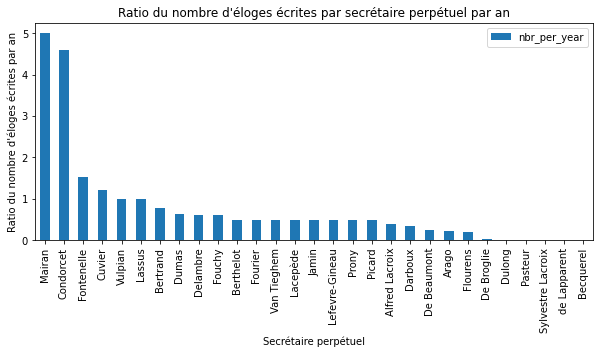

In [54]:
sec.sort_values(by='nbr_per_year', ascending = False, inplace = True)
sec.plot(x ='Name', y ='nbr_per_year', kind = 'bar', figsize=(10,4))
plt.title("Ratio du nombre d'éloges écrites par secrétaire perpétuel par an")
plt.xlabel("Secrétaire perpétuel")
plt.ylabel("Ratio du nombre d'éloges écrites par an")

In [65]:
def with_1943(row):
    if row['Début'] > 1943 :
        return np.nan
    elif row['Fin'] > 1943 :
        return 1943 - row['Début']
    else :
        return row['Duree']

sec['with_1943'] = sec.apply(lambda row : with_1943(row), axis=1)
sec['new_nbr'] = sec.apply(lambda row : row['Auteur']/row['with_1943'], axis = 1)

sec

,Name,Début,Fin,Aux_Début,Aux_Fin,Duree,index,Auteur,nbr_per_year,with_1943,new_nbr,has_eulogy
23,Mairan,1741,1743,0.0,0.0,2.0,Mairan,10.0,5.000000,2.0,5.000000,False
13,Condorcet,1776,1793,0.0,0.0,17.0,Condorcet,78.0,4.588235,17.0,4.588235,False
0,Fontenelle,1697,1740,0.0,0.0,43.0,Fontenelle,66.0,1.534884,43.0,1.534884,False
5,Cuvier,1799,1801,1803.0,1832.0,31.0,Cuvier,38.0,1.225806,31.0,1.225806,False
25,Vulpian,1886,1887,0.0,0.0,1.0,Vulpian,1.0,1.000000,1.0,1.000000,False
18,Lassus,1797,1799,0.0,0.0,2.0,Lassus,2.0,1.000000,2.0,1.000000,True
4,De Broglie,1942,1975,0.0,0.0,33.0,De Broglie,1.0,0.030303,1.0,1.000000,False
6,Bertrand,1874,1900,0.0,0.0,26.0,Bertrand,20.0,0.769231,26.0,0.769231,True
14,Dumas,1868,1884,0.0,0.0,16.0,Dumas,10.0,0.625000,16.0,0.625000,True
9,Delambre,1800,1802,1803.0,1822.0,21.0,Delambre,13.0,0.619048,21.0,0.619048,False


Text(0, 0.5, "Ratio du nombre d'éloges écrites par an")

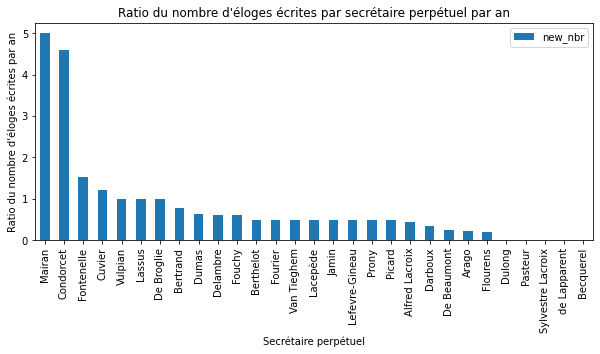

In [66]:
sec.sort_values(by='new_nbr', ascending = False, inplace = True)
sec.plot(x ='Name', y ='new_nbr', kind = 'bar', figsize=(10,4))

plt.title("Ratio du nombre d'éloges écrites par secrétaire perpétuel par an")
plt.xlabel("Secrétaire perpétuel")
plt.ylabel("Ratio du nombre d'éloges écrites par an")

In [57]:
# Vérifier que tous les secrétaires ont une éloge

sec['has_eulogy'] = sec['Name'].apply(lambda x : x in eulogies.Savant.unique())
sec

,Name,Début,Fin,Aux_Début,Aux_Fin,Duree,index,Auteur,nbr_per_year,with_1943,new_nbr,has_eulogy
23,Mairan,1741,1743,0.0,0.0,2.0,Mairan,10.0,5.000000,2.0,5.000000,False
13,Condorcet,1776,1793,0.0,0.0,17.0,Condorcet,78.0,4.588235,17.0,4.588235,False
0,Fontenelle,1697,1740,0.0,0.0,43.0,Fontenelle,66.0,1.534884,43.0,1.534884,False
5,Cuvier,1799,1801,1803.0,1832.0,31.0,Cuvier,38.0,1.225806,31.0,1.225806,False
25,Vulpian,1886,1887,0.0,0.0,1.0,Vulpian,1.0,1.000000,1.0,1.000000,False
18,Lassus,1797,1799,0.0,0.0,2.0,Lassus,2.0,1.000000,2.0,1.000000,True
4,De Broglie,1942,1975,0.0,0.0,33.0,De Broglie,1.0,0.030303,1.0,1.000000,False
6,Bertrand,1874,1900,0.0,0.0,26.0,Bertrand,20.0,0.769231,26.0,0.769231,True
14,Dumas,1868,1884,0.0,0.0,16.0,Dumas,10.0,0.625000,16.0,0.625000,True
9,Delambre,1800,1802,1803.0,1822.0,21.0,Delambre,13.0,0.619048,21.0,0.619048,False


In [58]:
df_no = sec[sec['has_eulogy'] == False]
df_no = df_no[df_no['Fin']<1944]
df_no

,Name,Début,Fin,Aux_Début,Aux_Fin,Duree,index,Auteur,nbr_per_year,with_1943,new_nbr,has_eulogy
23,Mairan,1741,1743,0.0,0.0,2.0,Mairan,10.0,5.000000,2.0,5.000000,False
13,Condorcet,1776,1793,0.0,0.0,17.0,Condorcet,78.0,4.588235,17.0,4.588235,False
0,Fontenelle,1697,1740,0.0,0.0,43.0,Fontenelle,66.0,1.534884,43.0,1.534884,False
5,Cuvier,1799,1801,1803.0,1832.0,31.0,Cuvier,38.0,1.225806,31.0,1.225806,False
25,Vulpian,1886,1887,0.0,0.0,1.0,Vulpian,1.0,1.000000,1.0,1.000000,False
9,Delambre,1800,1802,1803.0,1822.0,21.0,Delambre,13.0,0.619048,21.0,0.619048,False
3,Fouchy,1743,1776,0.0,0.0,33.0,Fouchy,20.0,0.606061,33.0,0.606061,False
22,Prony,1796,1798,0.0,0.0,2.0,Prony,1.0,0.500000,2.0,0.500000,False
21,Lefevre-Gineau,1798,1800,0.0,0.0,2.0,Lefevre-Gineau,1.0,0.500000,2.0,0.500000,False
19,Jamin,1884,1886,0.0,0.0,2.0,Jamin,1.0,0.500000,2.0,0.500000,False


In [59]:
eulogies.Savant[eulogies.Savant == 'de Fouchy'] = 'Fouchy'

<ipython-input-59-94e254bbc5a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eulogies.Savant[eulogies.Savant == 'de Fouchy'] = 'Fouchy'


In [60]:
eulogies[eulogies.Savant == 'Laparrent'] = 'de Lapparent'

In [61]:
eulogies[eulogies.Savant == 'Lacépède'] = 'Lacepède'

In [62]:
df_dup = eulogies[eulogies.duplicated(subset = 'Savant', keep = False)]
df_dup

,Savant,Auteur,Annee,Eloge,Sec
66,Petit,Mairan,1741.0,François Pourfour Du Petit naquit à Paris le 2...,True
83,Petit,Fouchy,1751.0,Jean-Louis Petit naquit à Paris d’une famille ...,True
110,Picard,Condorcet,1773.0,[Voyez sur Picard l’Histoire céleste. Il a sou...,True
144,Duhamel,Condorcet,1782.0,"Henri Louis Duhamel Dumonceau, inspecteur\n gé...",True
183,Dolomieu,Lacepède,1802.0,Peu de temps s'est écoulé depuis qu'une voix é...,True
199,Alexandre Brongniart et Adolphe Brongniart,Dumas,1811.0,Messieurs \n\tAu moment où l'Académie venait d...,True
202,Alexandre Brongniart et Adolphe Brongniart,Dumas,1811.0,Messieurs \n\tAu moment où l'Académie venait d...,True
204,Saint-Hilaire,Dumas,1812.0,"Messieurs, \n\tQuelques familles ont eu le pri...",True
208,Saint-Hilaire,Dumas,1812.0,"Messieurs, \n\tQuelques familles ont eu le pri...",True
222,De Beaumont,Bertrand,1819.0,"Messieurs, \n\tLa famille d'…lie de Beaumont e...",True


In [63]:
eulogies[eulogies['Auteur']=='Poincarre']

,Savant,Auteur,Annee,Eloge,Sec


In [64]:
eulogies[eulogies['Auteur'] == 'Cuvier']

,Savant,Auteur,Annee,Eloge,Sec
179,Lemonnier,Cuvier,1800.0,Si l'Institut national ne publie point ordinai...,True
180,Daubenton,Cuvier,1800.0,"Louis-Jean-Marie Daubenton, membre du Sénat co...",True
181,Gilbert,Cuvier,1801.0,Certaines personnes trouveront peut-être quelq...,True
182,Héritier,Cuvier,1801.0,Les hommes dont la classe de physique vous a r...,True
184,Darcet,Cuvier,1802.0,"Nous l'avouons, ce n'est pas sans crainte que ...",True
186,Priestley,Cuvier,1805.0,"Messieurs, \n\tJ'ai à vous entretenir de la vi...",True
188,Martin Cels,Cuvier,1806.0,"Jacques-Martin Cels, cultivateur-botaniste, me...",True
190,Adanson,Cuvier,1807.0,"Lorsque nous paraissons à cette tribune, c'est...",True
193,Broussonnet,Cuvier,1808.0,"\n \tPierre-Marie-Auguste Broussonnet, profess...",True
195,Ventenat,Cuvier,1809.0,"\n \t…tienne-Pierre Ventenat, membre de l'Inst...",True


In [52]:
sec[sec['Auteur']==0]

,Name,Début,Fin,Aux_Début,Aux_Fin,Duree,index,Auteur,nbr_per_year,has_eulogy,with_1943,new_nbr
19,Pasteur,1887,1889,0.0,0.0,2.0,Pasteur,0.0,0.0,False,2.0,0.0
20,Lefevre-Gineau,1798,1800,0.0,0.0,2.0,Lefevre-Gineau,0.0,0.0,False,2.0,0.0
21,Prony,1796,1798,0.0,0.0,2.0,Prony,0.0,0.0,False,2.0,0.0
23,Dulong,1832,1833,0.0,0.0,1.0,Dulong,0.0,0.0,False,1.0,0.0
24,Sylvestre Lacroix,1802,1803,0.0,0.0,1.0,Sylvestre Lacroix,0.0,0.0,False,1.0,0.0
26,de Lapparent,1907,1908,0.0,0.0,1.0,de Lapparent,0.0,0.0,True,1.0,0.0
27,Becquerel,1908,1909,0.0,0.0,1.0,Becquerel,0.0,0.0,False,1.0,0.0


In [53]:
eulogies[eulogies['Auteur']=='Condorcet']

,Savant,Auteur,Annee,Eloge,Sec
33,de la Chambre,Condorcet,1773.0,"[Condorcet avait mis, en marge de cette premiè...",True
34,Frenicle,Condorcet,1773.0,"Nicolas Frenicle de Bessy, conseiller à la cou...",True
35,Picard,Condorcet,1773.0,[Voyez sur Picard l’Histoire céleste. Il a sou...,True
36,Mariotte,Condorcet,1773.0,"Edme Mariotte naquit à Dijon, ou du moins il y...",True
37,Duclos,Condorcet,1773.0,"Samuel Cotreau Duclos, médecin ordinaire du ro...",True
...,...,...,...,...,...
111,Fougeroux,Condorcet,1789.0,"Auguste Denis Fougeroux, de l’Institut de Bolo...",True
112,de Fourcroy,Condorcet,1804.0,"Charles-René de Fourcroy, maréchal de camp, gr...",True
113,Turgot,Condorcet,1789.0,"Étienne-François Turgot, associé libre de l’Ac...",True
114,de L'Hôpital,Condorcet,1777.0,Chancelier de France. Discours présenté à L’ac...,True


# 3. EDA

https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

https://www.stat4decision.com/fr/traitement-langage-naturel-francais-tal-nlp/

### Nombre de caractères

Text(0, 0.5, 'Nombre d éloge')

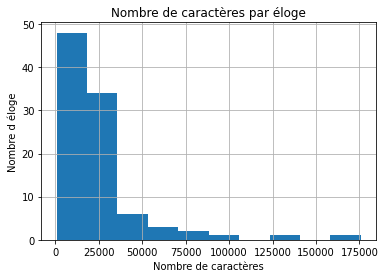

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

df['Eloge'].str.len().hist(ax = axes)
plt.title('Nombre de caractères par éloge')
plt.xlabel('Nombre de caractères')
plt.ylabel("Nombre d'éloges")

### Nombre de mots

Text(0, 0.5, "Nombre d'éloges")

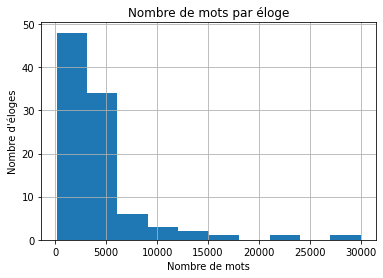

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

df['Eloge'].str.split().map(lambda x : len(x)).hist()

plt.title("Nombre de mots par éloge")
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre d'éloges")

- Tokenize
- Remove stop-words
- Lemmatize or stemming
- Representation as vectors (Bag of words, TF-IDF, embeddings)



- Separate by century or significant period
- Topic modelling using LDA(Latent Dirichlet Allocation) : each document represented by a list of topics and each topic represented by a list of words
- WordCloud : size and color of each word that appears in the wordcloud indicates its frequency and importance
- Textblob : library where the sentiment function returns two properties : polarity 1 means positive statement, -1 negative one and subjectivity how someone's judgement is shaped by personal opinions and feelings
- Named entity recognition : text classified in pre-defined entities to get insights of the type of entities present in the data
- Part Of Speech : assigns nature des mots to words



https://www.linkedin.com/pulse/using-nlp-lda-map-evolution-neural-information-systems-roy-cfa